# Exercise 1 - Group 4
- Matthias Egli
- Florian Bär
- Manuel Vogel
- Adrian Willi

In [38]:
import numpy as np
import itertools

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D

__a)__ Given the 1D example in Figure 1 compute the output of the convolution by hand considering the following stride and padding values :
- S = 1, P = 0 $\rightarrow$ [9, 6, -4, 5, 2, 2, 7]
- S = 2, P = 0 $\rightarrow$ [9, -4, 2, 7]
- S = 4, P = 0 $\rightarrow$ [9, 2]
- S = 1, P = 1 $\rightarrow$ [0, 9, 6, -4, 5, 2, 2, 7, 6]
- S = 4, P = 1 $\rightarrow$ [0, 5, 6]

_Example for S=4, P=1_
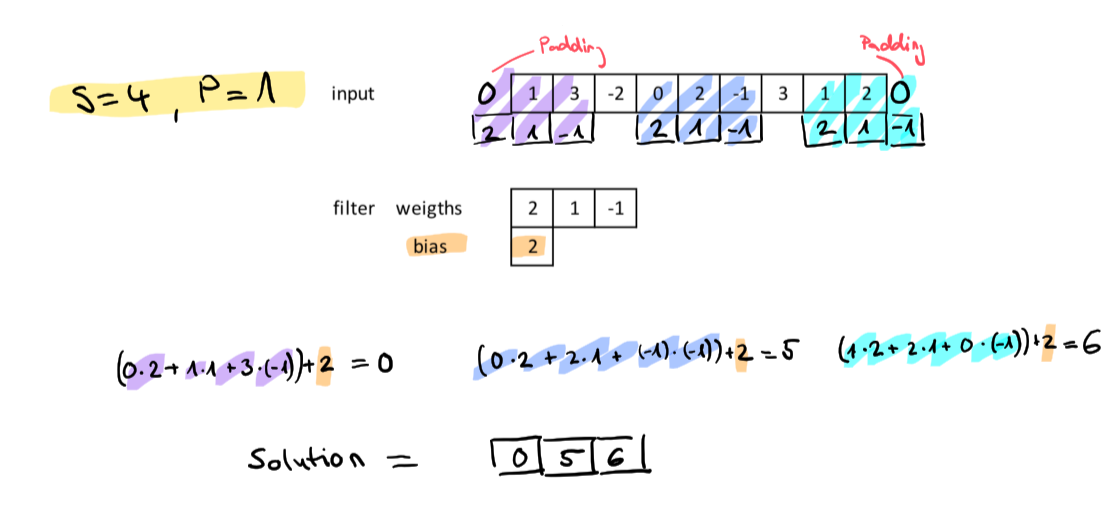


In the previous 1D examples, for which values of S and P do we get an output of same dimension as the input?
- - -
Only for S=1 and P=1

In [37]:
data = [[1, 3, -2, 0, 2, -1, 3, 1, 2]]
data = np.asarray(data)
data = data.reshape(1, 9, 1)

strides = [1, 2, 4]
paddings = ['valid', 'same']

for stride, pad in itertools.product(strides, paddings):

    model = Sequential()
    model.add(Conv1D(1, 3, strides=stride, padding=pad , input_shape=(9,1)))

    # define a weights and bias
    weights = np.asarray([[[2, 1, -1]]])
    weights = np.einsum('ijk -> kij', weights)
    bias = np.asarray([2.0])
    layer_weights = [weights, bias]
    # store the weights in the model
    model.set_weights(layer_weights)

    yhat = model.predict(data)
    yout = [yhat[0,c,0] for c in range(yhat.shape[1])]
    print('S={0}, P={1}: \t{2} ({3} elements)'.format(stride, pad, yout, len(yout)))

S=1, P=valid: 	[9.0, 6.0, -4.0, 5.0, 2.0, 2.0, 7.0] (7 elements)
S=1, P=same: 	[0.0, 9.0, 6.0, -4.0, 5.0, 2.0, 2.0, 7.0, 6.0] (9 elements)
S=2, P=valid: 	[9.0, -4.0, 2.0, 7.0] (4 elements)
S=2, P=same: 	[0.0, 6.0, 5.0, 2.0, 6.0] (5 elements)
S=4, P=valid: 	[9.0, 2.0] (2 elements)
S=4, P=same: 	[0.0, 5.0, 6.0] (3 elements)


__b)__ Given the 2D example in Figure 2 :
- How many activation maps will we obtain ?
    - 2 activation maps
    
    
- With S = 1 and P = 0, what will be the dimension of the output volume ?
    - It will be 3 x 3
    
    
- With S = 2 and P = 0, what will be the dimension of the output volume ?
    - It will be 2 x 2
    
    
- Give a filter size, padding value and stride value that will preserve the spatial dimension of the input.
    - This would be the case with Filter size = 2x2, stride = 1 and padding = 1
    
    
- Use the excel file provided to compute the values of the output with S = 1 and P = 0.

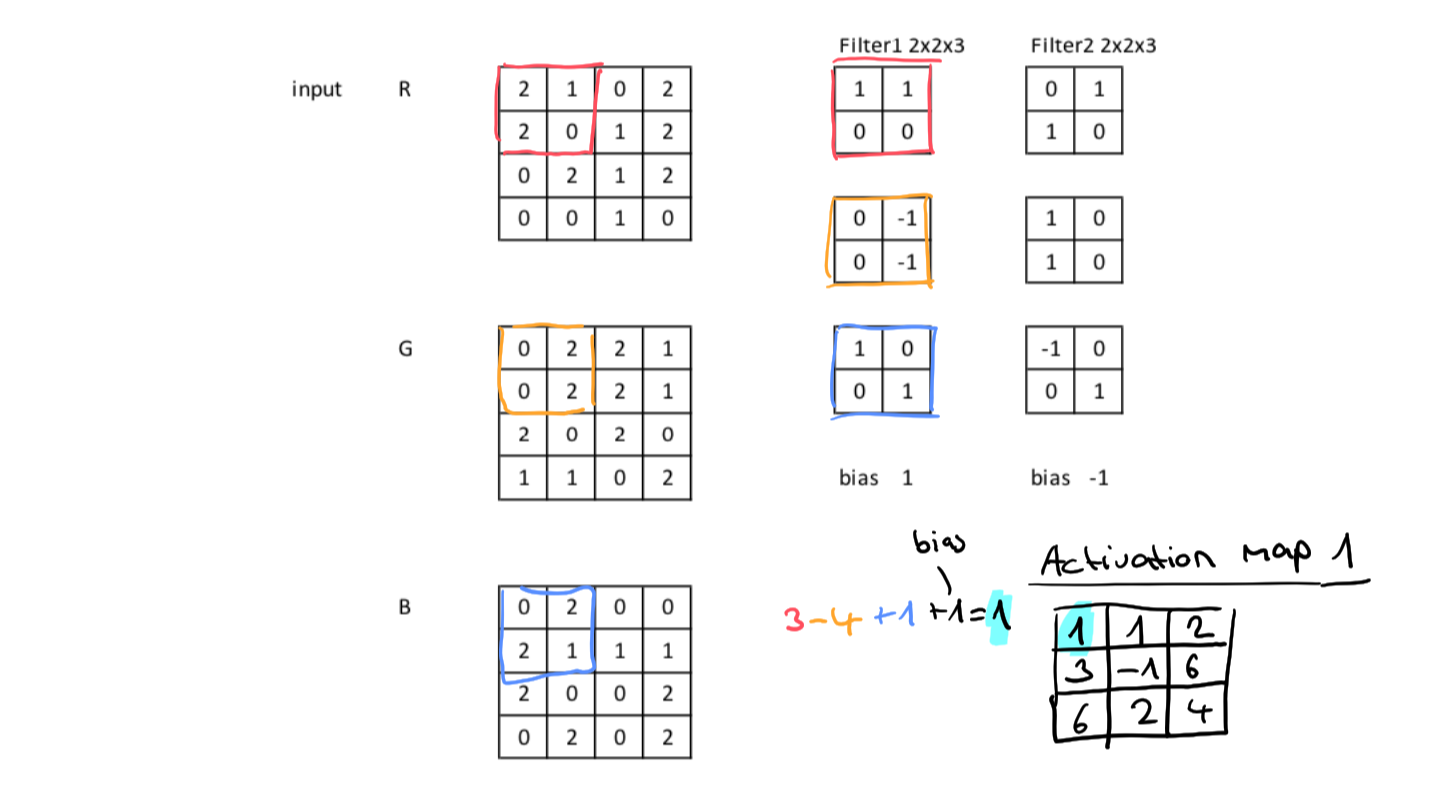

In [42]:
data_r = np.asarray([[2, 1, 0, 2],
                    [2, 0, 1, 2],
                    [0, 2, 1, 2],
                    [0, 0, 1, 0]])
data_g = np.asarray([[0, 2, 2, 1],
                    [0, 2, 2, 1],
                    [2, 0, 2, 0],
                    [1, 1, 0, 2]])
data_b = np.asarray([[0, 2, 0, 0],
                    [2, 1, 1, 1],
                    [2, 0, 0, 2],
                    [0, 2, 0, 2]])

data = np.stack([data_r, data_g, data_b], axis=-1)
data = data.reshape(1, 4, 4, 3)

for stride in [1, 2]:
    print('-'*20 + 'Stride: {}'.format(stride) + '-'*20)
    # create model
    model = Sequential()
    model.add(Conv2D(2, (2,2), strides=stride, padding='valid', input_shape=(4, 4, 3)))

    # define a weights and bias
    weights = np.asarray([
        [ 
            [ # index (0, 0)
                [1, 0, 1], # filter 1, values for R G B
                [0, 1, -1], # filter 2, values for R G B
            ],
            [ # index (1, 0)
                [1, -1, 0],
                [1, 0, 0],
            ],
        ],
        [
            [ # index (0, 1)
                [0, 0, 0],
                [1, 1, 0],
            ],
            [ # index (1, 1)
                [0, -1, 1],
                [0, 0, 1],
            ],
        ]
    ])
    weights = np.einsum('...ij -> ...ji', weights)
    bias = np.asarray([1, -1])
    layer_weights = [weights, bias]
    # store the weights in the model
    model.set_weights(layer_weights)

    # apply filter to input data
    yhat = model.predict(data)
    print('Output dimension: {}'.format(yhat.squeeze().shape))
    for a in range(yhat.shape[-1]):
        print('Activation map: {}'.format(a))
        print(yhat[0, :, :, a])

--------------------Stride: 1--------------------
Output dimension: (3, 3, 2)
Activation map: 0
[[ 1.  1.  2.]
 [ 3. -1.  6.]
 [ 6.  2.  4.]]
Activation map: 1
[[ 3.  2.  7.]
 [-1.  3.  7.]
 [ 4.  1.  6.]]
--------------------Stride: 2--------------------
Output dimension: (2, 2, 2)
Activation map: 0
[[1. 2.]
 [6. 4.]]
Activation map: 1
[[3. 7.]
 [4. 6.]]
